In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import OrderedDict

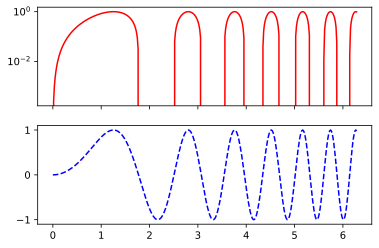

In [14]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
ax0.set_yscale("log")
line0, = ax0.plot(x, y, color='r')


#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
line1, = ax1.plot(x, y, color='b', linestyle='--')
plt.setp(ax0.get_xticklabels(), visible=False)
'''

# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

# put lened on first subplot
ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
'''
plt.show()

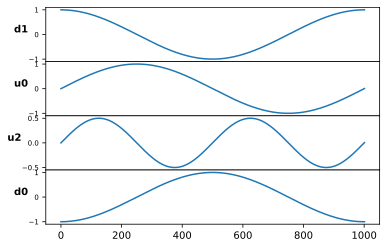

In [15]:
t = np.linspace(0,1001,1000)
arr1 = np.cos(2*np.pi*t/1000)
arr2 = np.sin(2*np.pi*t/1000)
arr3 = arr1*arr2


pulses = {'d1':arr1,'u0':arr2, 'u2':arr3, 'd0':-arr1}

labels = ['a','d','m','u'] # labels for different channels:
                           # a: acquire, d: drive, m: measure, u: x-correlation

num_chans = len(pulses)
gs = gridspec.GridSpec(num_chans, 1)
ax = []

#Need to reverse the order of channels in dictionary. Everything needs to sync with the x-axis of the bottom plot.
fig = plt.figure()
for chan_num, chan in enumerate(pulses.keys()):
    if chan_num == 0:
        ax.append(plt.subplot(gs[chan_num]))
    else: 
        ax.append(plt.subplot(gs[chan_num], sharex=ax[0]))
    if chan_num < num_chans - 1:
        plt.setp(ax[chan_num].get_xticklabels(), visible=False)
    
    #ax[chan_num].text(0,0, chan, horizontalalignment='center',verticalalignment='center', fontweight='bold')
    ax[chan_num].tick_params(axis='y', which='major', labelsize=7)
    #ax[chan_num].tick_params(axis="y",direction="in", pad=-22)
    #ax[chan_num].get_yaxis().set_ticks([])
    ax[chan_num].set_ylabel(chan+'  ', rotation=0, fontweight='bold')
    ax[chan_num].plot(t,pulses[chan])
    
plt.subplots_adjust(hspace=.0)
plt.show()

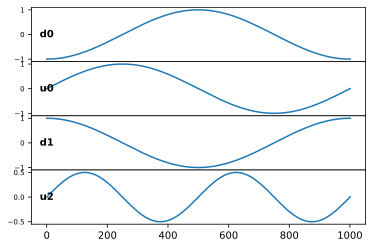

In [16]:
#pulses = {'d1':arr1,'u0':arr2, 'd0':arr3, 'u2':-arr1}
pulses = {'d1':arr1,'u0':arr2, 'u2':arr3, 'd0':-arr1}
#pulses = {'d1':arr1,'u0':arr2, 'u2':arr3}

labels = ['a','d','m','u'] # labels for different channels:
                           # a: acquire, d: drive, m: measure, u: x-correlation

num_chans = len(pulses)
gs = gridspec.GridSpec(num_chans, 1)
ax = []
fig = plt.figure()    
    
# Channel index value is calculated as follows:
# chan[0] stores the type of channel: a, d, m, u. By using the index value of the 'labels' list, 
# we know the position the channel holds within a given qubit. chan[1] stores the qubit value, so 
# by multiplying by the length of the 'labels' list, we know where the qubit sits wrt the others.
# by adding the two, we know where a given qubit channel should sit wrt to other channels.
pulses_srt = sorted(pulses.items(), 
                    key=lambda indx: (labels.index(indx[0][0])+int(indx[0][1])*len(labels)))


for chan_num, chan in enumerate(pulses_srt):
    if chan_num == 0:
        ax.append(plt.subplot(gs[chan_num]))
    else: 
        ax.append(plt.subplot(gs[chan_num], sharex=ax[0]))
    if chan_num < num_chans - 1:
        plt.setp(ax[chan_num].get_xticklabels(), visible=False)
    
    ax[chan_num].text(0,0, chan[0], horizontalalignment='center',verticalalignment='center', fontweight='bold')
    ax[chan_num].tick_params(axis='y', which='major', labelsize=7)
    #ax[chan_num].tick_params(axis="y",direction="in", pad=-22)
    #ax[chan_num].get_yaxis().set_ticks([])
    #ax[chan_num].set_ylabel(chan+'  ', rotation=0, fontweight='bold')
    ax[chan_num].plot(t,chan[1])
    
plt.subplots_adjust(hspace=.0)
plt.show()

In [17]:
pelsus = {'d0':'arr1','u1':'arr2', 'd2':'arr1', 'u0':'arr3', 'd1':'arr1'}
pelsus_sort = sorted(pelsus.items())
pelsus_sort

[('d0', 'arr1'),
 ('d1', 'arr1'),
 ('d2', 'arr1'),
 ('u0', 'arr3'),
 ('u1', 'arr2')]

In [18]:
pelsus_sort2 = sorted(pelsus.items(), 
                      key=lambda indx: (labels.index(indx[0][0])+int(indx[0][1])*len(labels)))
pelsus_sort2

[('d0', 'arr1'),
 ('u0', 'arr3'),
 ('d1', 'arr1'),
 ('u1', 'arr2'),
 ('d2', 'arr1')]

In [19]:
for chan in pelsus_sort2:
    print(chan[0])

d0
u0
d1
u1
d2


In [20]:
phases = {'d1':'ps1','u0':'ps2'}
freqs = {'u0':'fs2', 'u2':'fs3'}
pulses = {'u0':'pl1'}


def dummy_func(phases,freqs,pulses):
    phase_chans = set(phases.keys())
    freq_chans = set(freqs.keys())
    pulses_srtc = pulses
    

    for chan in (set.union(phase_chans,freq_chans)):
        if chan not in pulses_srt:
            pulses_srtc[chan]=np.array([0])

dummy_func(phases,freqs,pulses)

In [21]:
labels = ['a','d','m','u']
phases2 = {'d1':[[0,1],[1,2],[3,5],[10,1]],'u0':[[1,2],[2,1],[3,2],[4,3]]}
phases2_srt = sorted(phases2.items(), 
                    key=lambda indx: (labels.index(indx[0][0])+int(indx[0][1])*len(labels)))

print(phases2_srt)

[('u0', [[1, 2], [2, 1], [3, 2], [4, 3]]), ('d1', [[0, 1], [1, 2], [3, 5], [10, 1]])]


In [22]:
for chan_num, chan in enumerate(phases2):
    print(chan_num, phases2[chan])

0 [[0, 1], [1, 2], [3, 5], [10, 1]]
1 [[1, 2], [2, 1], [3, 2], [4, 3]]


In [23]:
for chan_num, chan in enumerate(phases2_srt):
    print(chan_num, chan[1])

0 [[1, 2], [2, 1], [3, 2], [4, 3]]
1 [[0, 1], [1, 2], [3, 5], [10, 1]]


In [24]:
labels = ['a','d','m','u']
phases2 = {'d1':[[0,1],[1,2],[3,5],[10,1]],'u0':[[1,2],[2,1],[3,2],[4,3]]}
phases2_srt = sorted(phases2.items(), 
                    key=lambda indx: (labels.index(indx[0][0])+int(indx[0][1])*len(labels)))

print(phases2_srt)

[('u0', [[1, 2], [2, 1], [3, 2], [4, 3]]), ('d1', [[0, 1], [1, 2], [3, 5], [10, 1]])]


In [25]:
for chan_num, chan in enumerate(phases2_srt):
    print(chan_num, chan[0])

0 u0
1 d1


In [26]:
alst = ['a','b','c']
alst.index('b')

1

In [27]:
backend_qubit_lst = []
backend_chan_lst = []
backend_cmap_lst = []


num_qbs = 20

for qb_num in range(num_qbs):
    backend_qubit_lst.append('q'+str(qb_num))
    
backend_qubit_lst

['q0',
 'q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19']

In [28]:
nativegate_input_lst = ['X','Y','Z','H','ID','SX','RX','CX']
nativegate_input_lst[0:len(nativegate_input_lst)-1]

['X', 'Y', 'Z', 'H', 'ID', 'SX', 'RX']

In [29]:
aaa = ['q0','q12']
int(aaa[1][1:])

12

In [30]:
qb_pair = [2,13]
qb_pair = ['q'+str(qb) for qb in qb_pair]
qb_pair

['q2', 'q13']

In [31]:
a = np.linspace(0,1,101)

In [34]:
type(a)

numpy.ndarray